In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!kaggle datasets download -d ashkhagan/figshare-brain-tumor-dataset

 98% 825M/839M [00:06<00:00, 221MB/s]
100% 839M/839M [00:06<00:00, 142MB/s]


In [ ]:
! unzip figshare-brain-tumor-dataset.zip

Archive:  figshare-brain-tumor-dataset.zip
  inflating: dataset/README.txt      
  inflating: dataset/cvind.mat       
  inflating: dataset/data/1.mat      
  inflating: dataset/data/10.mat     
  inflating: dataset/data/100.mat    
  inflating: dataset/data/1000.mat   
  inflating: dataset/data/1001.mat   
  inflating: dataset/data/1002.mat   
  inflating: dataset/data/1003.mat   
  inflating: dataset/data/1004.mat   
  inflating: dataset/data/1005.mat   
  inflating: dataset/data/1006.mat   
  inflating: dataset/data/1007.mat   
  inflating: dataset/data/1008.mat   
  inflating: dataset/data/1009.mat   
  inflating: dataset/data/101.mat    
  inflating: dataset/data/1010.mat   
  inflating: dataset/data/1011.mat   
  inflating: dataset/data/1012.mat   
  inflating: dataset/data/1013.mat   
  inflating: dataset/data/1014.mat   
  inflating: dataset/data/1015.mat   
  inflating: dataset/data/1016.mat   
  inflating: dataset/data/1017.mat   
  inflating: dataset/data/1018.mat   
  infla

In [ ]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import h5py
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense,Activation
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D,Input,concatenate
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, load_model
import cv2
from tensorflow import keras
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.vgg16 import VGG16

In [ ]:
datadir="/content/dataset/data"
N=3064
traindata=[]

for i in range(1,N+1):
    filename=str(i)+".mat"
    data=h5py.File(os.path.join(datadir,filename),"r")
    traindata.append(data)

    if i%100==0:
      print(filename)

100.mat
200.mat
300.mat
400.mat
500.mat
600.mat
700.mat
800.mat
900.mat
1000.mat
1100.mat
1200.mat
1300.mat
1400.mat
1500.mat
1600.mat
1700.mat
1800.mat
1900.mat
2000.mat
2100.mat
2200.mat
2300.mat
2400.mat
2500.mat
2600.mat
2700.mat
2800.mat
2900.mat
3000.mat


In [ ]:
import random

random.shuffle(traindata)

In [ ]:
train_images = []
train_labels = []
test_images = []
test_labels = []
temp=round(4*3064/5)

for i in range(temp):
  img = traindata[i]["cjdata"]["image"]
  if img.shape==(512,512):
    img=np.expand_dims(img,axis=2)
    train_images.append(img)
    lbl = traindata[i]["cjdata"]["label"]
    label=int(lbl[0])-1
    train_labels.append(label)

for i in range(temp,3064):
  img = traindata[i]["cjdata"]["image"]
  if img.shape==(512,512):
    img=np.expand_dims(img,axis=2)
    test_images.append(img)
    lbl = traindata[i]["cjdata"]["label"]
    label=int(lbl[0])-1
    test_labels.append(label) 

In [ ]:
train_images = np.array(train_images)
train_labels = np.array(train_labels)
test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [ ]:
image_size = [512,512]
img_input = Input(shape=(512,512,1))
img_conc = concatenate([img_input, img_input, img_input])

In [ ]:
vgg = VGG16(input_tensor = img_conc,weights='imagenet',include_top=False)
for layer in vgg.layers:
    layer.trainable = False
x1 = vgg.output

In [ ]:
resnet = ResNet50(weights='imagenet', include_top=False, input_tensor = img_conc)
for layer in resnet.layers:
    layer.trainable = False
x2 = resnet.output

In [ ]:
x = concatenate([x1,x2])
x = layers.Flatten()(x)
x = layers.Activation("relu")(x)

x = layers.Dense(256,"relu")(x)

x = layers.Dense(512,"relu")(x)

x = layers.Dense(3)(x)
pred=layers.Activation("softmax")(x)

In [ ]:
model = keras.Model(inputs=img_input,outputs=pred)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 512, 512, 1  0           []                               
                                )]                                                                
                                                                                                  
 concatenate (Concatenate)      (None, 512, 512, 3)  0           ['input_1[0][0]',                
                                                                  'input_1[0][0]',                
                                                                  'input_1[0][0]']                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 518, 518, 3)  0           ['concatenate[0][0]']        

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [ ]:
r = model.fit(train_images,train_labels,epochs=10,batch_size=16,shuffle = False)

Epoch 1/10
153/153 [==============================] - 104s 555ms/step - loss: 184.1268 - accuracy: 0.8142
Epoch 2/10
153/153 [==============================] - 81s 531ms/step - loss: 19.6660 - accuracy: 0.9085
Epoch 3/10
153/153 [==============================] - 81s 532ms/step - loss: 10.9232 - accuracy: 0.9377
Epoch 4/10
153/153 [==============================] - 81s 533ms/step - loss: 27.1899 - accuracy: 0.9188
Epoch 5/10
153/153 [==============================] - 82s 533ms/step - loss: 8.4307 - accuracy: 0.9639
Epoch 6/10
153/153 [==============================] - 82s 533ms/step - loss: 3.5657 - accuracy: 0.9717
Epoch 7/10
153/153 [==============================] - 81s 532ms/step - loss: 1.7020 - accuracy: 0.9368
Epoch 8/10
153/153 [==============================] - 82s 533ms/step - loss: 0.3519 - accuracy: 0.9401
Epoch 9/10
153/153 [==============================] - 81s 532ms/step - loss: 0.3440 - accuracy: 0.9528
Epoch 10/10
153/153 [==============================] - 82s 533ms/st

In [ ]:
result=model.evaluate(test_images,test_labels)
print(result)

20/20 [==============================] - 40s 1s/step - loss: 2.5692 - accuracy: 0.9165
[2.5691726207733154, 0.9165302515029907]


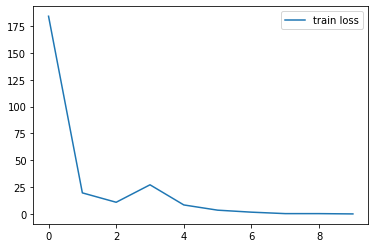

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
# plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss_VGGnet')

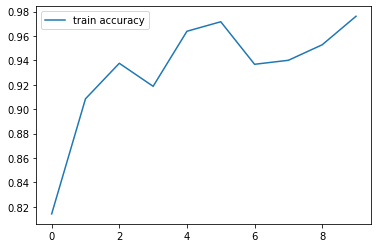

In [ ]:
# plot the loss
plt.plot(r.history['accuracy'], label='train accuracy')
# plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

In [ ]:
!pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 992.0/992.0 KB 15.5 MB/s eta 0:00:00


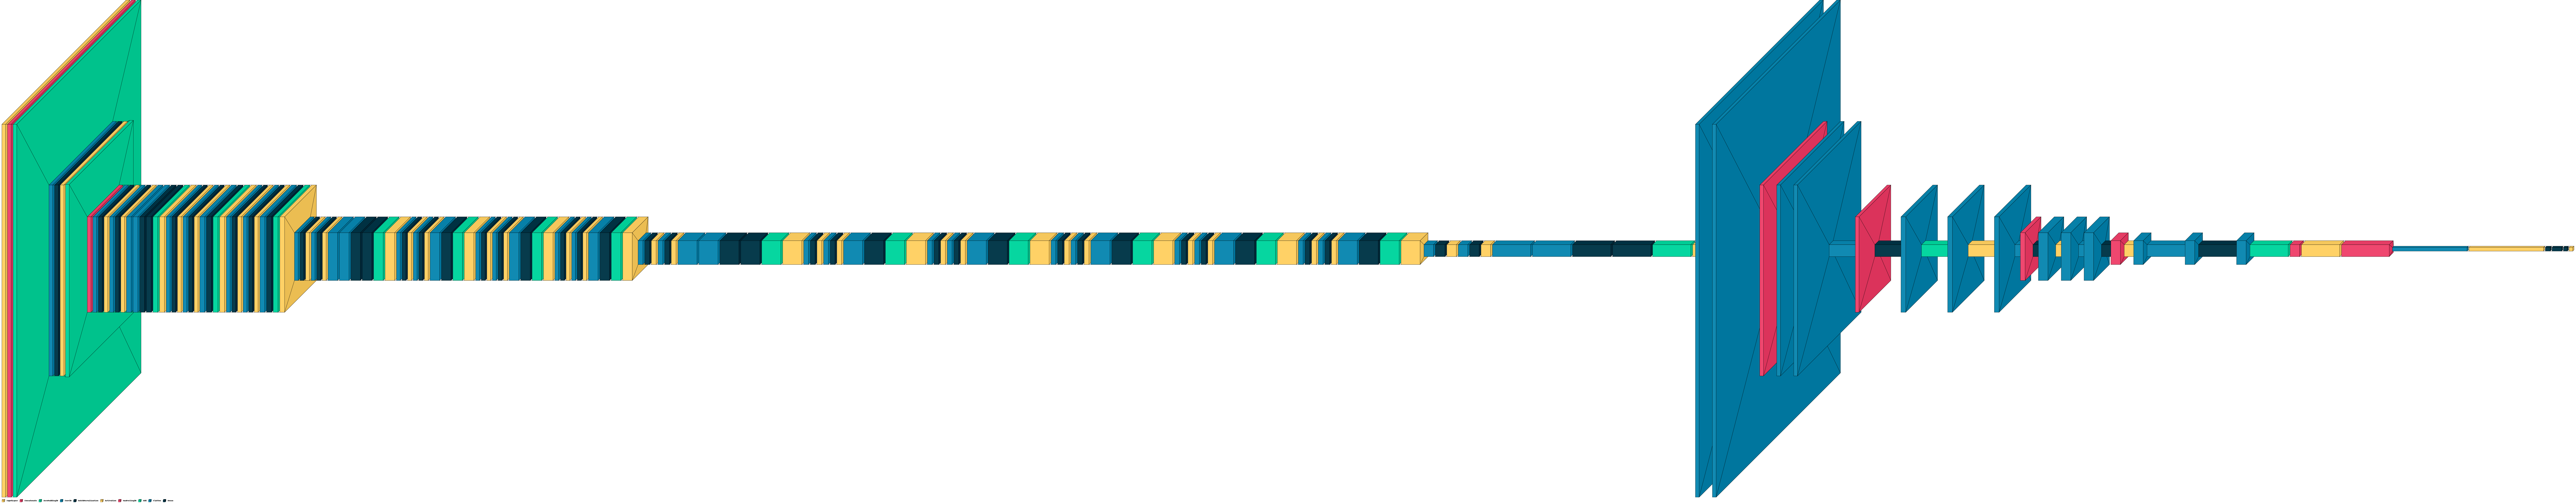

In [ ]:
import visualkeras
visualkeras.layered_view(model, legend=True,draw_volume=True)

In [ ]:
label_pred_keras = model.predict(test_images)
print(label_pred_keras)

20/20 [==============================] - 4s 171ms/step
[[1.3561707e-03 9.9591774e-01 2.7261376e-03]
 [6.8370675e-05 5.8175123e-04 9.9934989e-01]
 [7.8466597e-05 3.7443657e-05 9.9988413e-01]
 ...
 [3.3821787e-05 9.0648589e-04 9.9905974e-01]
 [2.9130373e-04 1.0002379e-04 9.9960870e-01]
 [3.1533960e-05 2.1669897e-05 9.9994683e-01]]


In [ ]:
label_pred_keras = model.predict(test_images[1][None,...])
print(label_pred_keras)

1/1 [==============================] - 0s 64ms/step
[[1. 0. 0.]]


In [ ]:
final_class = np.unravel_index(label_pred_keras.argmax(),label_pred_keras.shape)
if final_class[1] == 0:
  print("meningioma")
elif final_class[1] == 1:
  print("glioma")
else:
  print("pituitary")

meningioma


In [ ]:
test_labels[1]

0

In [ ]:
model.save('Concat_model.h5')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp "/content/Concat_model.h5" "/content/drive/MyDrive/Final_year_project/Pri/"

In [ ]:
from sklearn.metrics import f1_score,confusion_matrix,roc_curve, roc_auc_score,accuracy_score,precision_score,recall_score

In [ ]:
label_pred_keras = model.predict(test_images)
print(label_pred_keras)

20/20 [==============================] - 19s 986ms/step
[[0.         0.         1.        ]
 [1.         0.         0.        ]
 [0.         0.         1.        ]
 ...
 [0.         1.         0.        ]
 [0.         0.         1.        ]
 [0.39616367 0.46226248 0.1415738 ]]


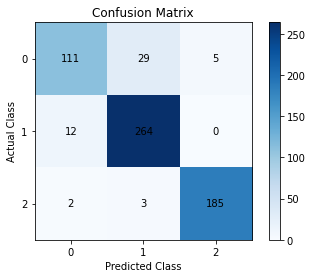

In [ ]:
Pred_Label = np.argmax(label_pred_keras, axis=1)
ConfusionM = confusion_matrix(list(test_labels), Pred_Label, labels=[0, 1, 2])
plt.imshow(ConfusionM, cmap='Blues')
plt.colorbar()
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('Confusion Matrix')
plt.xticks(np.arange(ConfusionM.shape[1]))
plt.yticks(np.arange(ConfusionM.shape[0]))
plt.grid(False)

for i in range(ConfusionM.shape[0]):
    for j in range(ConfusionM.shape[1]):
        plt.text(j, i, ConfusionM[i, j], ha='center', va='center', color='black')

plt.show()

In [ ]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(test_labels, Pred_Label)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(test_labels, Pred_Label, average = 'macro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(test_labels, Pred_Label, average = 'macro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(test_labels, Pred_Label, average = 'macro')
print('F1 score: %f' % f1)

Accuracy: 0.916530
Precision: 0.917859
Recall: 0.898574
F1 score: 0.906328
